# DOW visualization

This is some visualization of week-scale periodic behaviour.

In [104]:
# Preliminary setup
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [107]:
# Import dataset from df.pickle
df = pd.read_pickle("alldata_clean.pickle")
display(df.describe())
display(df.head(5))

,active,reactive,volts,amps,sub1,sub2,sub3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,6.731540e-02,7.791120e-02,4.674672e-03
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,3.691819e-01,3.493216e-01,2.095930e-02
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,6.000000e-02,3.600000e-03
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,5.280000e+00,4.800000e+00,2.880000e-01


,active,reactive,volts,amps,sub1,sub2,sub3
dtime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,0.06,0.0036
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,0.06,0.0036
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,0.12,0.0072
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,0.06,0.0036
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,0.06,0.0036


In [108]:
# Create any working columns for analysis
df['subs'] = df[['sub1','sub2','sub3']].sum(axis=1)
df['house'] = df.active - df.subs

In [109]:
def seasonPlotColumn(colname):
    seasons = ['Winter','Spring','Summer','Fall']
    seasonrs = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]
    f, axes = plt.subplots(2, 2,figsize=(8,8), sharex=True, sharey=True)  
    plt.tight_layout(h_pad=3.0)

    colseries = df[colname]
    display("Mean: %.3g SDev: %.3g" % (colseries.mean(), colseries.std()))
    
    for i, ax in enumerate(axes.flatten()):
        season = seasons[i]
        seasonr = seasonrs[i]
        ds = colseries[df.index.month.isin(seasonr)]

        # Plot a trace of hourly average power for each DOW
        g = ds.groupby([ds.index.hour,ds.index.dayofweek]) # df.index.dayofweek,
        ax = g.mean().unstack().plot(ax=ax,grid=True)

        if i<3: 
            ax.get_legend().remove()
        else:
            ax.legend(title="Monday=0",bbox_to_anchor=(1,.5), loc="lower left")

        ax.set_xlabel("hour")
        ax.set_ylabel("Power(kw)")
        ax.set_title(season + ": " + str(seasonr))

# Power Plots by DOW

### Active Power

'Mean: 1.09 SDev: 1.06'

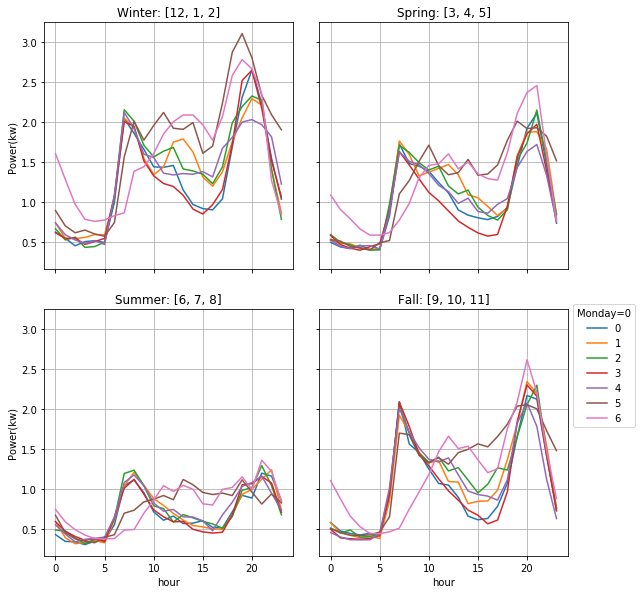

In [110]:
display(Markdown('# Power Plots by DOW'))
display(Markdown('### Active Power'))
seasonPlotColumn('active')

### Sub1: Kitchen

'Mean: 0.0673 SDev: 0.369'

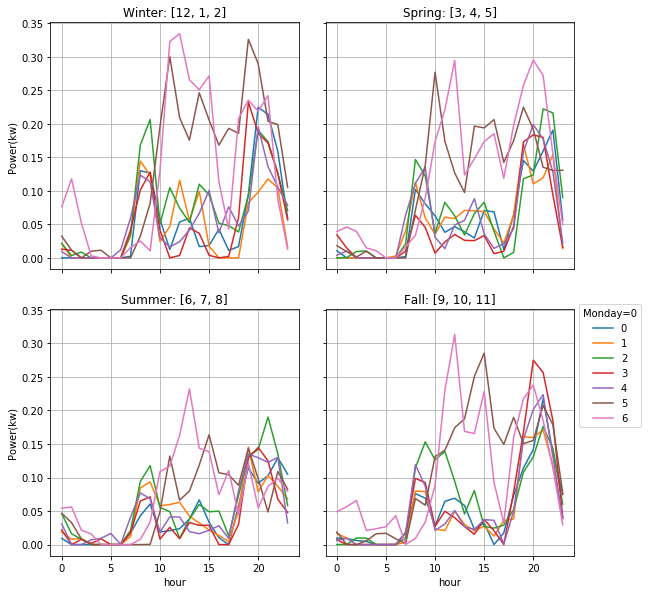

In [111]:
display(Markdown('### Sub1: Kitchen'))
seasonPlotColumn('sub1')

### Sub2: Laundry

'Mean: 0.0779 SDev: 0.349'

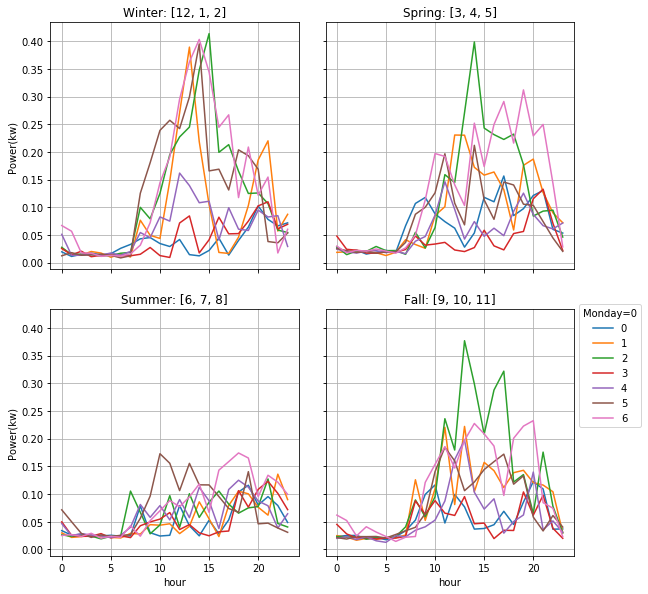

In [112]:
display(Markdown('### Sub2: Laundry'))
seasonPlotColumn('sub2')

### Sub3: Mechanical

'Mean: 0.00467 SDev: 0.021'

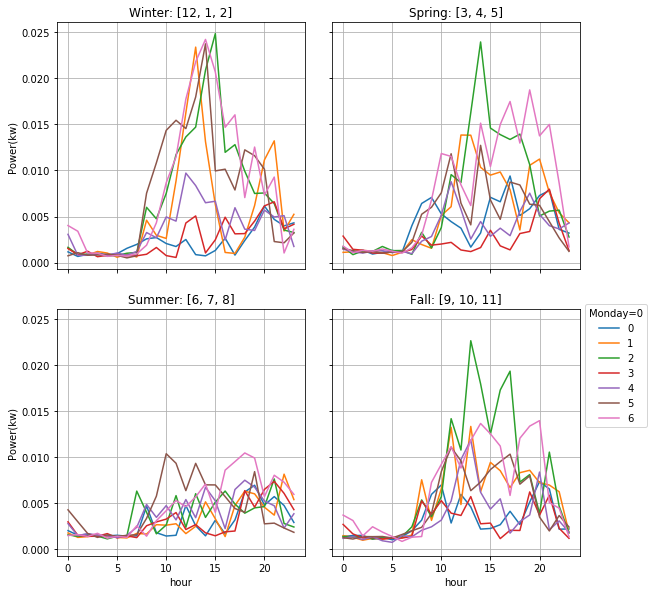

In [113]:
display(Markdown('### Sub3: Mechanical'))
seasonPlotColumn('sub3')

### House: Active less submeters

'Mean: 0.942 SDev: 0.829'

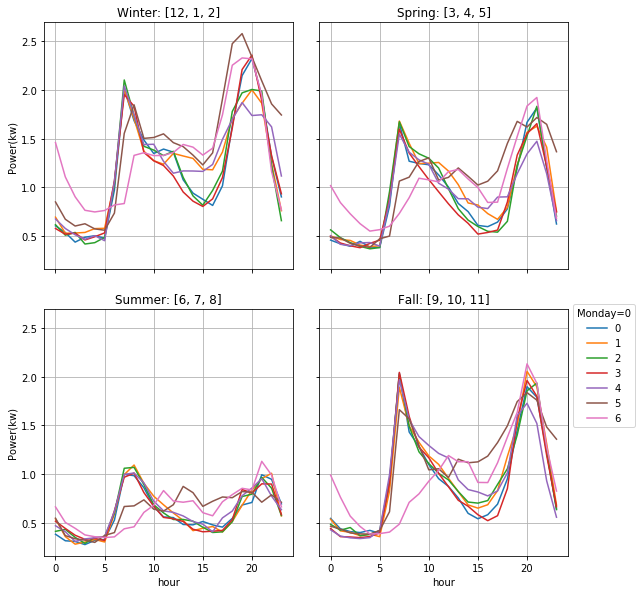

In [114]:
display(Markdown('### House: Active less submeters'))
seasonPlotColumn('house')